In [130]:
import pandas as pd
import numpy as np

# Before-After
print("Before-After")
data = pd.read_table('yrbs.tsv', sep = "\t")
print("Dimension: ", data.shape)
print()
print("Variable: ", data.shape[1])
print()
print("Missing value: ")
print(data.isnull().sum())
print()
print("Variable code: ")
print(data.dtypes)
print()
data['campaign'] = np.where(data['year'] <= 2005, 0, 1)
print(data)

Before-After
Dimension:  (58077, 6)

Variable:  6

Missing value: 
year     0
age      0
sex      0
meth     0
tv       0
state    0
dtype: int64

Variable code: 
year      int64
age       int64
sex      object
meth      int64
tv        int64
state    object
dtype: object

       year  age sex  meth  tv state  campaign
0      2003   13   M     0   1    XX         0
1      2003   13   M     1   1    XX         0
2      2003   13   M     1   1    XX         0
3      2003   13   M     0   1    XX         0
4      2003   13   M     0   0    XX         0
5      2003   13   M     0   1    XX         0
6      2003   13   M     0   0    XX         0
7      2003   14   M     0   1    XX         0
8      2003   14   M     0   1    XX         0
9      2003   14   M     0   1    XX         0
10     2003   14   M     0   1    XX         0
11     2003   14   M     0   1    XX         0
12     2003   14   M     0   1    XX         0
13     2003   14   M     0   1    XX         0
14     2003   14   M 

Graphical Exploration


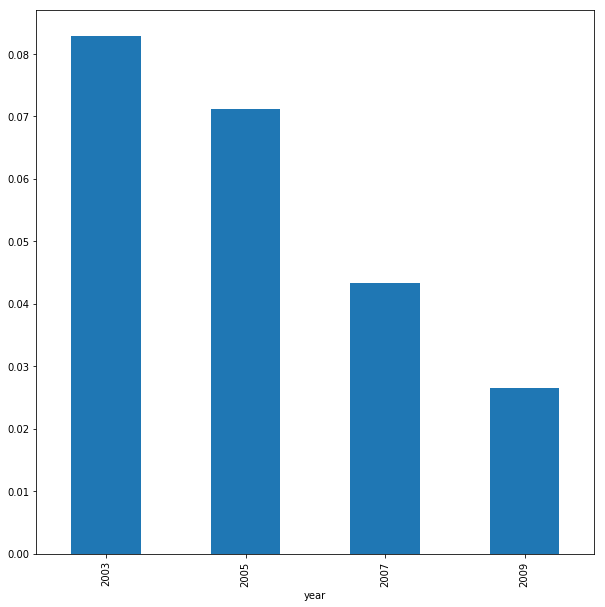

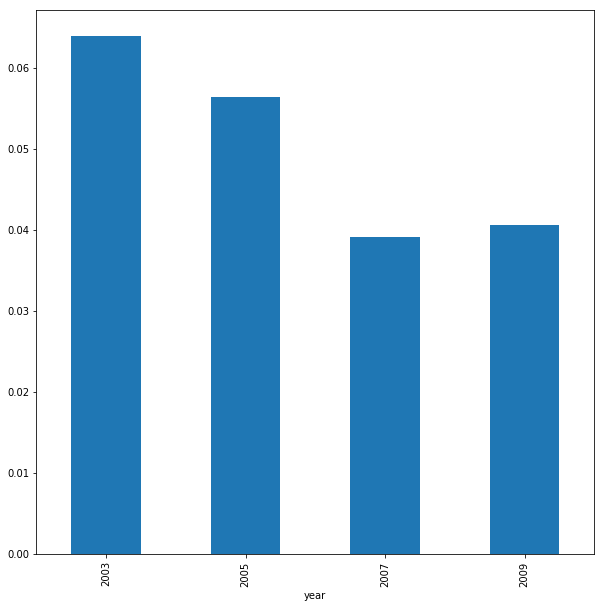

year
2003    0.063931
2005    0.056422
2007    0.039130
2009    0.040600
Name: meth, dtype: float64
Meth use was higher in Montana than in other states.
After campaign, the meth use decreased in Montana and other states.
There was slight increase in Meth in other states in 2009, but it is still less than the meth use before the campaign.


In [131]:
import matplotlib.pyplot as plt# Graphical Exploration
print("Graphical Exploration")
axis = data[data['state'] == 'MT'].groupby(['year'])['meth'].mean().T
fig, ax = plt.subplots(figsize = (10, 10))
axis.plot(kind="bar", ax=ax)
plt.show()

axis2 = data[data['state'] != 'MT'].groupby(['year'])['meth'].mean().T
fig2, ax2 = plt.subplots(figsize = (10, 10))
axis2.plot(kind="bar", ax=ax2)
plt.show()
print(year)

print("Meth use was higher in Montana than in other states.")
print("After campaign, the meth use decreased in Montana and other states.")
print("There was slight increase in Meth in other states in 2009, but it is still less than the meth use before the campaign.")

In [132]:
print("Before-After Estimator")
import statsmodels.formula.api as smf

ols_regression = smf.ols(formula = 'meth ~ campaign', data = data[data['state'] == 'MT']).fit()
print(ols_regression.summary())
print("We reject null hypothesis that there is no strong correlation between meth use and campaign in Montana.");

Before-After Estimator
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           2.19e-16
Time:                        22:17:24   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0767      0.

In [133]:
print("Cross-Sectional Estimator")
ols_regression = smf.ols(formula = 'meth ~ state', data = data[data['campaign'] == 1]).fit()
print(ols_regression.summary())
print("We accept null hypothesis that there is correlation between meth use and different state after the campaign.")

Cross-Sectional Estimator
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 07 Feb 2018   Prob (F-statistic):              0.554
Time:                        22:17:25   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381  

In [135]:
print("Differences-in-Differences Estimator")
ols_regression = smf.ols(formula = 'meth ~ state + year + age + sex + tv', data = data).fit()
print(ols_regression.summary())
print("We reject the null hypothesis for all variables.")

Differences-in-Differences Estimator
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     48.39
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           3.77e-50
Time:                        22:19:16   Log-Likelihood:                 5593.4
No. Observations:               58077   AIC:                        -1.117e+04
Df Residuals:                   58071   BIC:                        -1.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    